# Bank customer churn prediction

1. Domain exploration
    - Understand the buisness process, understand the mindset of stakeholders on shopfloor
    - Understand common challenges,  business beleif, recent development in business
    - understand process of data collection, sources of data, common possible issues with data
    - Understand data lifecycle, business lifecycle
    
    
2. Data collection and exploration
    - collect data from multiple sources, build a dataset
    - perform common exploration to understand overall data quality
    
    
3. Data Cleaning
    - Handle missing values
    - Handle duplicated entrie
    - Handle outliers, unwanted columns
    

4. Feature Engineering
    Feature Extraction
    Feature Selection: Exploratory Data Analytics / Root Cause Analytics
    - Data Visualization
        - Unvariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
        
      
     - Statistical Research techniques
         - Correlation Analysis
         - ANOVA - f test
         - Chi Square test
       
       
5. Preprocessing of features
    - encode the features 
    - Standardize the numeric features
    - train test split
    
  
6. Apply ML on data
    - train the ML model
    
    
7. Performance ANalysis
    - Use appropriate metric to assess performance of ML model
    
    
8. Optimization and Tuning
    - improve the performance of model
    
    
9. Deploy the model
    - export the model as an object file (pickle file)
    - Deploy the model as REST API service
    
 
10. Monitor the performance in production

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Collection and Exploration

In [2]:
df = pd.read_csv(r"D:\AI\data\datasets-1\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.describe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9985.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     5.013721   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.892213   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count      9990.000000  10000.000000  
mean     100127.441333      0.203700  
std       57497.228065      0.402769  
min          11.580000      0.000000  
25%       51112.885000      0.000000  
50%      100238.110000      0.000000  
75%      149400.922500      0.000000  
max      199992.480000      1.000000

Observation

    - unwanted columns: RowNumber, CustomerId, Surname
    - Target: Exited
    - Demographhic info: Age, Geography, Gender
    - financial information: CrediScore, Balance, EstimatedSalary
    - Relation with bank: Tenure, NumOfProducts, IsActiveMember
    - atleast 25% of customers have 0 balance in account

## 3. Data Cleaning

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for missing values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [7]:
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_19444/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010333
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001322
Exited             1.471611
dtype: float64

In [8]:
df.EstimatedSalary.fillna(df.EstimatedSalary.mean(),inplace=True)
df.Tenure.fillna(df.Tenure.mean(),inplace=True)

In [9]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# check for outliers
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_19444/3256115495.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

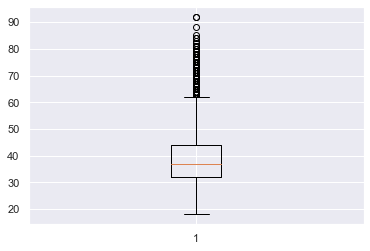

In [11]:
sns.set_theme()
plt.boxplot(df.Age)
plt.show()

In [12]:
sum(df.Age>62)

359

In [13]:
thresh = df.Age.quantile(0.99)
df.Age[df.Age>thresh] = thresh

C:\Users\admin\AppData\Local\Temp/ipykernel_19444/925322517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df.Age>thresh] = thresh


In [14]:
df.Age.skew()

0.9140946314454033

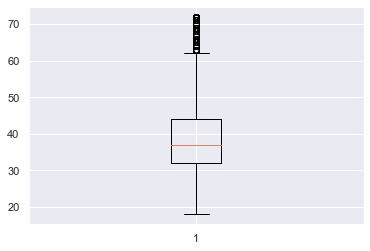

In [15]:
sns.set_theme()
plt.boxplot(df.Age)
plt.show()

In [16]:
# drop unwanted cols
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
df.head(2)

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42     2.0      0.00              1   
1          608     Spain  Female   41     1.0  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0

## 4. Feature Engineering
### Feature Selection

### Statistical Research

#### Correlation Analysis

In [17]:
cor = df.corr()
cor

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.004727  0.001164  0.006268       0.012238   
Age                -0.004727  1.000000 -0.010561  0.029449      -0.030953   
Tenure              0.001164 -0.010561  1.000000 -0.012565       0.014004   
Balance             0.006268  0.029449 -0.012565  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030953  0.014004 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011637  0.022343 -0.014858       0.003183   
IsActiveMember      0.025651  0.083484 -0.028704 -0.010084       0.009612   
EstimatedSalary    -0.001101 -0.007166  0.006989  0.012377       0.013985   
Exited             -0.027094  0.290878 -0.014167  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001101 -0.027094  
Age              -0.011637        0.083484        -0.007166  0.290878  
Tenure            0.022343       -0.028704         0.006989 -0.014167  
Balance          -0.014858       -0.010084         0.012377  0.118533  
NumOfProducts     0.003183        0.009612         0.013985 -0.047820  
HasCrCard         1.000000       -0.011866        -0.010307 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.010813 -0.156128  
EstimatedSalary  -0.010307       -0.010813         1.000000  0.012503  
Exited           -0.007138       -0.156128         0.012503  1.000000

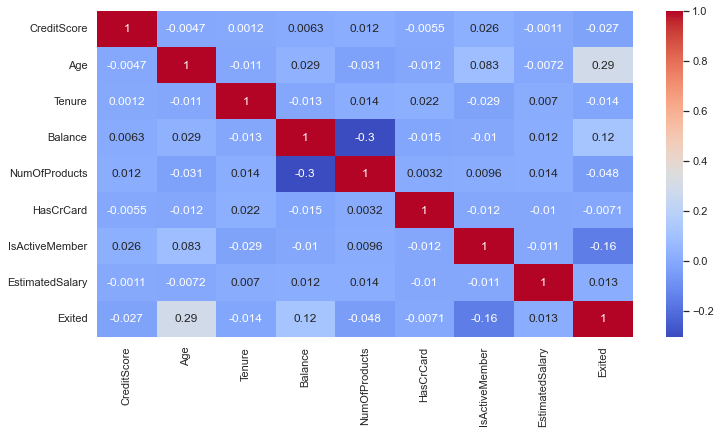

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

### ANOVA (f test)- Analysis of variance 

    - used to compare mean/distribution of a numeric attribute across multiple groups
    
    - Here it can be used to compare distribution of CreditScore across mulitple groups - Exited=0 and Exited=1

    Null Hypothesis: (business belief) - means of a numeric attribute across multiple groups is similar

    Null Hypothesis: distribution of CreditScore across multiple groups (exited = 0 and exited=1) is similar


- for any hypothesis testing scenario, we need to come up with a  business confidence (confidence interval) CI = 95%

- significance level, alpha = 1 - CI = 1 - 0.95 = 0.05

when you apply ANOVA or any other test, you will get pvalue

    if pvalue > alpha = we accept null hypothesis - feature is not important/informative
    if pvalue < alpha = we reject the null hypothesis - feature is important / informative

In [19]:
nums= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
xnum = df[nums]
y = df.Exited
xnum.head(2)

CreditScore  Age  Tenure   Balance  NumOfProducts  EstimatedSalary
0          619   42     2.0      0.00              1        101348.88
1          608   41     1.0  83807.86              1        112542.58

In [20]:
from sklearn.feature_selection import f_classif
fscore, pvalue = f_classif(xnum,y)
for i in range(len(nums)):print(nums[i],pvalue[i])

CreditScore 0.006738213892258643
Age 3.210618658489915e-194
Tenure 0.1565917661952313
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.21124537599025905


### Chi Square test - categoric v/s categoric 

    - used to compare distribution of a categoric attribute across multiple groups
    
    - Here it can be used to compare distribution of Gender across mulitple groups - Exited=0 and Exited=1

    Null Hypothesis: (business belief) - distribution of a categoric attribute across multiple groups is similar

    Null Hypothesis: distribution of Gender across multiple groups (exited = 0 and exited=1) is similar


- for any hypothesis testing scenario, we need to come up with a  business confidence (confidence interval) CI = 95%

- significance level, alpha = 1 - CI = 1 - 0.95 = 0.05

when you apply ANOVA or any other test, you will get pvalue

    if pvalue > alpha = we accept null hypothesis - feature is not important/informative
    if pvalue < alpha = we reject the null hypothesis - feature is important / informative

In [21]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
xcat = df[cats]
y = df.Exited
xcat.head()

Geography  Gender  HasCrCard  IsActiveMember
0    France  Female          1               1
1     Spain  Female          0               1
2    France  Female          1               0
3    France  Female          0               0
4     Spain  Female          1               1

In [22]:
from sklearn.preprocessing import LabelEncoder
xcat.Geography = LabelEncoder().fit_transform(xcat.Geography)
xcat.Gender = LabelEncoder().fit_transform(xcat.Gender)
xcat.head()

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Geography  Gender  HasCrCard  IsActiveMember
0          0       0          1               1
1          2       0          0               1
2          0       0          1               0
3          0       0          0               0
4          2       0          1               1

In [23]:
from sklearn.feature_selection import chi2
chiscore,pvalue = chi2(xcat,y)

for i in range(len(cats)):print(cats[i],pvalue[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27


In [24]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [25]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df.Exited
x.shape,y.shape

((10000, 7), (10000,))

## 5. Preprocessing of features

In [26]:
x.head(8)

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0          619    France  Female   42       0.00              1   
1          608     Spain  Female   41   83807.86              1   
2          502    France  Female   42  159660.80              3   
3          699    France  Female   39       0.00              2   
4          850     Spain  Female   43  125510.82              1   
5          645     Spain    Male   44  113755.78              2   
6          822    France    Male   50       0.00              2   
7          376   Germany  Female   29  115046.74              4   

   IsActiveMember  
0               1  
1               1  
2               0  
3               0  
4               1  
5               0  
6               1  
7               0

    - for nominal attribute
        - having two categories: Labelencoding, onehotencoding
        - Having more than two categories: OneHotEncoding
    - for ordinal attribute: OrdinalEncoder

In [27]:
# onehotencoding
pd.get_dummies(df.Geography).head(8)

France  Germany  Spain
0       1        0      0
1       0        0      1
2       1        0      0
3       1        0      0
4       0        0      1
5       0        0      1
6       1        0      0
7       0        1      0

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),
                                 ('sc',StandardScaler(),[0,3,4,5])],
                               remainder='passthrough')
a
x2.head()

0    1    2         3         4         5         6    7
0  0.0  0.0  0.0 -0.326221  0.301467 -1.225848 -0.911583  1.0
1  0.0  1.0  0.0 -0.440036  0.204793  0.117350 -0.911583  1.0
2  0.0  0.0  0.0 -1.536794  0.301467  1.333053  2.527057  0.0
3  0.0  0.0  0.0  0.501521  0.011446 -1.225848  0.807737  0.0
4  0.0  1.0  0.0  2.063884  0.398140  0.785728 -0.911583  1.0

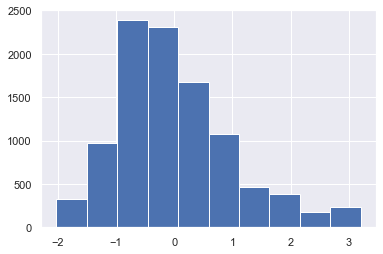

In [29]:
plt.hist(x2[4])
plt.show()

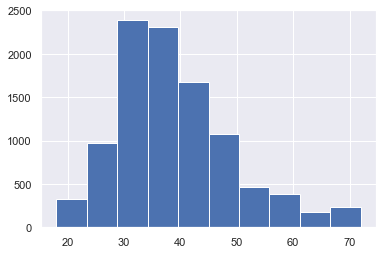

In [30]:
plt.hist(x['Age'])
plt.show()

In [31]:
# train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=3,stratify=y)
print(x2.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(10000, 8) (8000, 8) (2000, 8)
(10000,) (8000,) (2000,)


## 6. Apply ML - logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# train the model
model.fit(xtr,ytr)

LogisticRegression()

In [33]:
# cust = CS=650 age = 45, bal = 251100, geo = france, gen = female, iam = 1, nop = 3
cust = [[650,'France','Female',45,25110,3,1]]
cust = transformer.transform(cust)

model.predict(cust)

array([0], dtype=int64)

## 7. Performance Analysis

In [34]:
# get the accuracy of model on testdata
ypred = model.predict(xts)

from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.815

In [35]:
# check for recall
metrics.recall_score(yts,ypred)

0.2334152334152334

In [36]:
metrics.precision_score(yts,ypred)

0.6209150326797386

In [37]:
metrics.f1_score(yts,ypred)

0.33928571428571425

In [38]:
metrics.confusion_matrix(yts,ypred)

array([[1535,   58],
       [ 312,   95]], dtype=int64)

In [39]:
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.62      0.23      0.34       407

    accuracy                           0.81      2000
   macro avg       0.73      0.60      0.62      2000
weighted avg       0.79      0.81      0.78      2000



## KNN Implementation

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)

# train the model using train data
model2.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=3)

In [41]:
# cust = CS=650 age = 45, bal = 251100, geo = france, gen = female, iam = 1, nop = 3
cust = [[650,'France','Female',45,25110,3,1]]
cust = transformer.transform(cust)

model2.predict(cust)

array([1], dtype=int64)

In [42]:
# analyzing performance on test data
ypred = model2.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.65      0.53      0.58       407

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [43]:
import joblib
joblib.dump(model,"Logistic_Regression_churn.pkl")

['Logistic_Regression_churn.pkl']

In [44]:
joblib.dump(model2,"KNN_churn.pkl")

['KNN_churn.pkl']

# Decision Tree implementation

In [45]:
from sklearn import tree
model3 = tree.DecisionTreeClassifier(criterion='gini',random_state=3)
model3.fit(xtr,ytr)

DecisionTreeClassifier(random_state=3)

In [46]:
# cust = CS=650 age = 45, bal = 251100, geo = france, gen = female, iam = 1, nop = 3
cust = [[650,'France','Female',45,25110,3,1]]
cust = transformer.transform(cust)

model3.predict(cust)

array([1], dtype=int64)

In [47]:
# analyzing performance on test data
ypred = model3.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1593
           1       0.48      0.54      0.51       407

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.79      2000



In [48]:
# analyzing performance on train data
ypred = model3.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



### Overfitting / High Variance
    - performance of model on train data: High
    - performance of model on test data: Low
    
#### Why overfitting occurs?
    - lack of training samples
    - presence of irrelevant/noisy features
    - choice of learning algorithm is super complex
    
    
#### How to handle overfitting?
    - get more data points / samples / observation (get more rows), NO need for more columns
    - drop some slightly less relevant columns
    - Choosing slightly less complex learning algorithm
    - in case of decision tree decrease the values of max_parameters such as max_depth, max_leaf_nodes, increase the values of min parameters such as min_samples_leaf, min_samples_split
    - for KNN, increase the value
    

### Underfitting / High Bias
    - performance of model on train data: Low
    - performance of model on test data: Low
    
#### Why underfitting occurs?
    - lack of informative features
    - presence of noisy rows
    - choice of learning algorithm is less efficient
    
#### How to handle underfitting?
    - get more columns, no need to get more rows
    - drop some noisy rows
    - Choosing slightly more complex learning algorithm
    - in case of decision tree increase the values of max_parameters such as max_depth, max_leaf_nodes, decrease the values of min parameters such as min_samples_leaf, min_samples_split
    - for KNN, decrease the value

In [49]:
from sklearn import tree
model4 = tree.DecisionTreeClassifier(criterion='gini',random_state=3,
                                    max_depth=9,min_samples_leaf=15,min_samples_split=40)
model4.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=15, min_samples_split=40,
                       random_state=3)

In [50]:
# analyzing performance on test data
ypred = model4.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.74      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [51]:
# analyzing performance on train data
ypred = model4.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      6370
           1       0.79      0.51      0.62      1630

    accuracy                           0.87      8000
   macro avg       0.84      0.74      0.77      8000
weighted avg       0.87      0.87      0.86      8000



### Hyperparameter tuning with GridSearch

In [52]:
params = {"max_depth":np.arange(5,20,1),
          "min_samples_leaf":np.arange(5,50,4),
          "min_samples_split":np.arange(10,70,4)}
params

{'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'min_samples_leaf': array([ 5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49]),
 'min_samples_split': array([10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66])}

In [53]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(tree.DecisionTreeClassifier(random_state=3),scoring='f1',
                     param_grid=params,verbose=True,n_jobs=-1,cv=5)

search.fit(x2,y)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([ 5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49]),
                         'min_samples_split': array([10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66])},
             scoring='f1', verbose=True)

In [54]:
search.best_score_

0.5854923557456037

In [55]:
search.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=62,
                       random_state=3)

## Visualizing Decision Tree

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),],
                               remainder='passthrough')
transformer.fit(x)
x2 = pd.DataFrame(transformer.transform(x))
# train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=3,stratify=y)

In [57]:
model4 = tree.DecisionTreeClassifier(criterion='gini',random_state=3,
                                    max_depth=7,min_samples_leaf=25,min_samples_split=60)
model4.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=25, min_samples_split=60,
                       random_state=3)

In [58]:
feature_names = transformer.get_feature_names()
class_names = ['Not Exited','Exited']

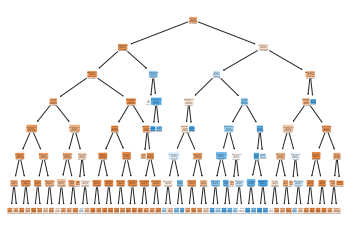

In [59]:
tree.plot_tree(model4,feature_names=feature_names,class_names=class_names,
              filled=True,rounded=True)
plt.show()

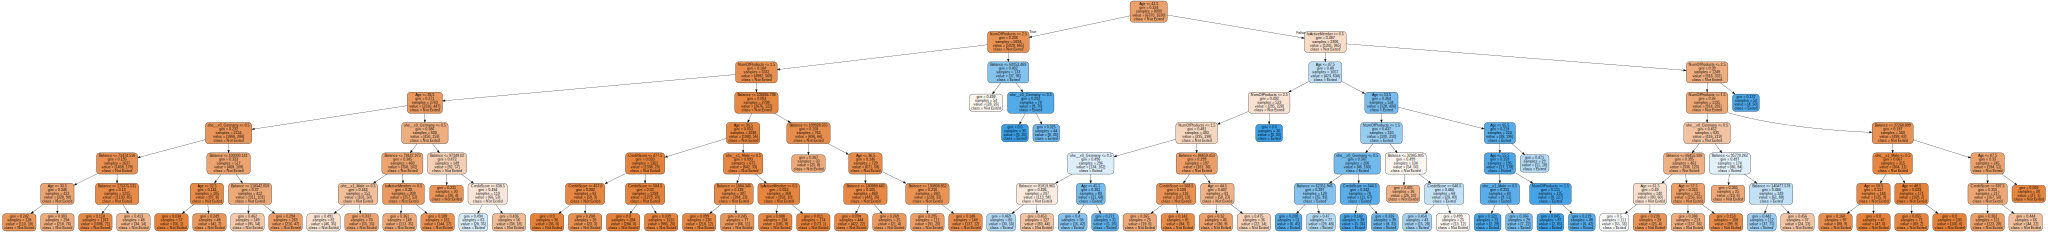

In [60]:
# Use graphviz
# get the graphviz executable installed from http://graphviz.org/download/
# pip install graphviz
import graphviz

graphdata = tree.export_graphviz(model4,feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

In [61]:
graph.format='png'
graph.render("myimage")

'myimage.png'

In [62]:
model4.feature_importances_

array([0.04789161, 0.        , 0.00571418, 0.00864467, 0.40933562,
       0.10874253, 0.28728567, 0.13238572])

In [63]:
for i in range(len(feature_names)):print(feature_names[i],model4.feature_importances_[i])

ohe__x0_Germany 0.04789161401178666
ohe__x0_Spain 0.0
ohe__x1_Male 0.005714182447851487
CreditScore 0.008644667929578725
Age 0.4093356169411579
Balance 0.10874253138070504
NumOfProducts 0.28728566676570044
IsActiveMember 0.13238572052321976


### Using class weights to handle imbalance data

In [64]:
from sklearn import tree
model4 = tree.DecisionTreeClassifier(criterion='gini',random_state=3,
                                    max_depth=9,min_samples_leaf=15,min_samples_split=40,
                                    class_weight='balanced')
model4.fit(xtr,ytr)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       min_samples_leaf=15, min_samples_split=40,
                       random_state=3)

In [65]:
# analyzing performance on test data
ypred = model4.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.78      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.80      2000



In [66]:
# analyzing performance on train data
ypred = model4.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      6370
           1       0.51      0.82      0.63      1630

    accuracy                           0.80      8000
   macro avg       0.73      0.81      0.75      8000
weighted avg       0.86      0.80      0.82      8000



In [67]:
macro_avg = (0.87+0.63)/2
macro_avg

0.75

In [68]:
weighted_avg = (0.87*6370 + 0.63*1630)/8000
weighted_avg

0.8210999999999999

## Random Forest implementation

In [69]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=300,random_state=3,class_weight='balanced',
                               max_depth=6,min_samples_leaf=10,n_jobs=-1)

model5.fit(xtr,ytr)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=10, n_estimators=300, random_state=3)

In [78]:
# analyzing performance on test data
ypred = model5.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1593
           1       0.52      0.75      0.61       407

    accuracy                           0.81      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [79]:
# analyzing performance on train data
ypred = model5.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      6370
           1       0.53      0.74      0.62      1630

    accuracy                           0.81      8000
   macro avg       0.73      0.79      0.75      8000
weighted avg       0.85      0.81      0.82      8000



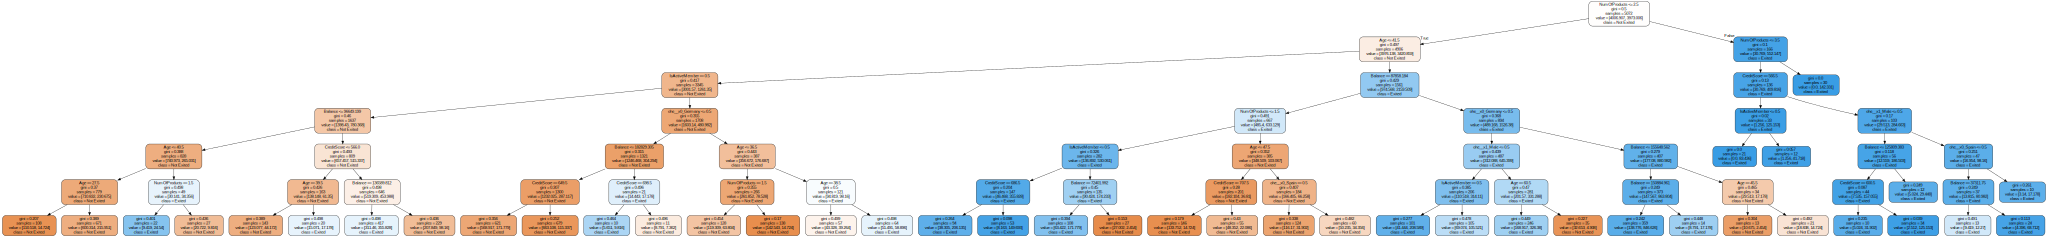

In [74]:
graphdata = tree.export_graphviz(model5[0],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

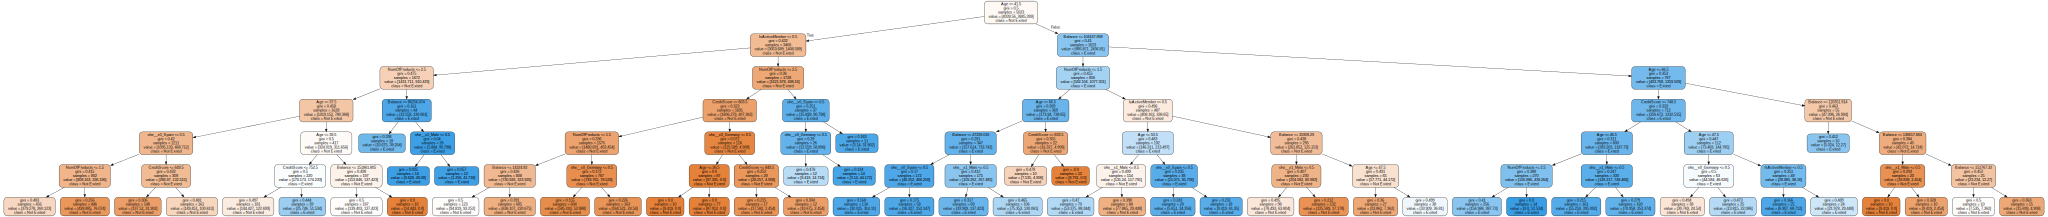

In [75]:
graphdata = tree.export_graphviz(model5[1],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

## Implementing Adaboost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

model6 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1,class_weight='balanced'),
                            n_estimators=200)

model6.fit(xtr,ytr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1),
                   n_estimators=200)

In [77]:
# analyzing performance on test data
ypred = model6.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



In [80]:
# analyzing performance on train data
ypred = model6.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6370
           1       0.49      0.76      0.60      1630

    accuracy                           0.79      8000
   macro avg       0.71      0.78      0.73      8000
weighted avg       0.84      0.79      0.81      8000



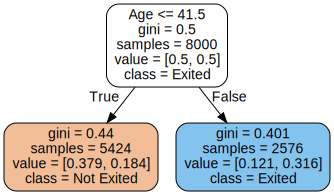

In [81]:
graphdata = tree.export_graphviz(model6[0],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

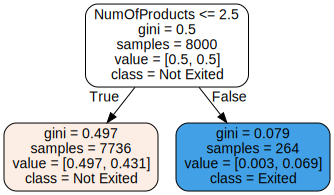

In [82]:
graphdata = tree.export_graphviz(model6[1],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

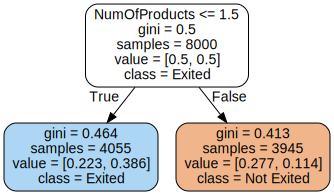

In [83]:
graphdata = tree.export_graphviz(model6[2],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

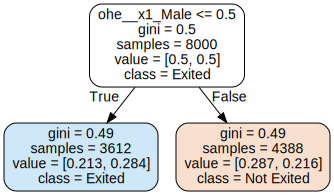

In [84]:
graphdata = tree.export_graphviz(model6[5],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

## Gradient Boost implementation

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
model7 = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05)

model7.fit(xtr,ytr)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=500)

In [96]:
# analyzing performance on test data
ypred = model7.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.50      0.60       407

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [97]:
# analyzing performance on train data
ypred = model7.predict(xtr)
print(metrics.classification_report(ytr,ypred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.83      0.54      0.65      1630

    accuracy                           0.88      8000
   macro avg       0.86      0.76      0.79      8000
weighted avg       0.88      0.88      0.87      8000



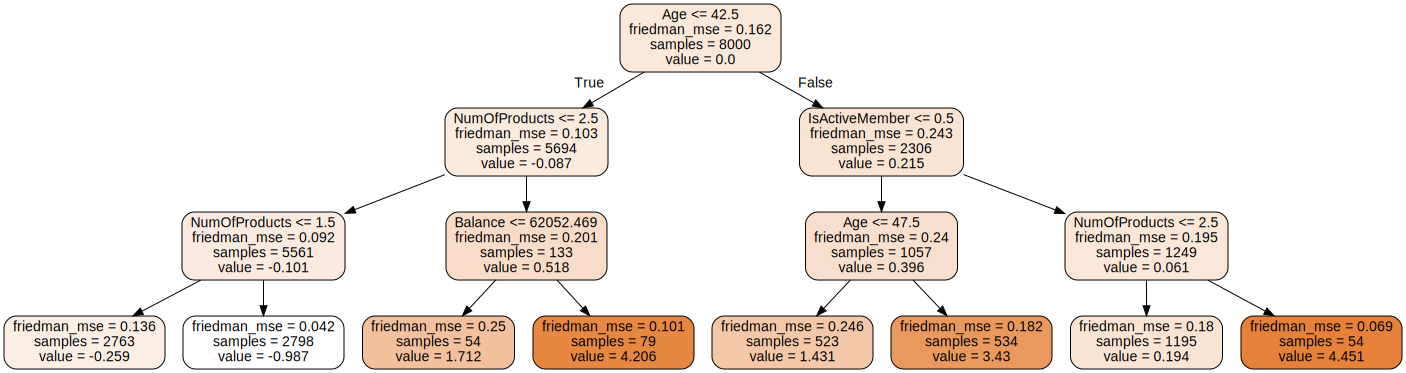

In [98]:
graphdata = tree.export_graphviz(model7[0][0],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

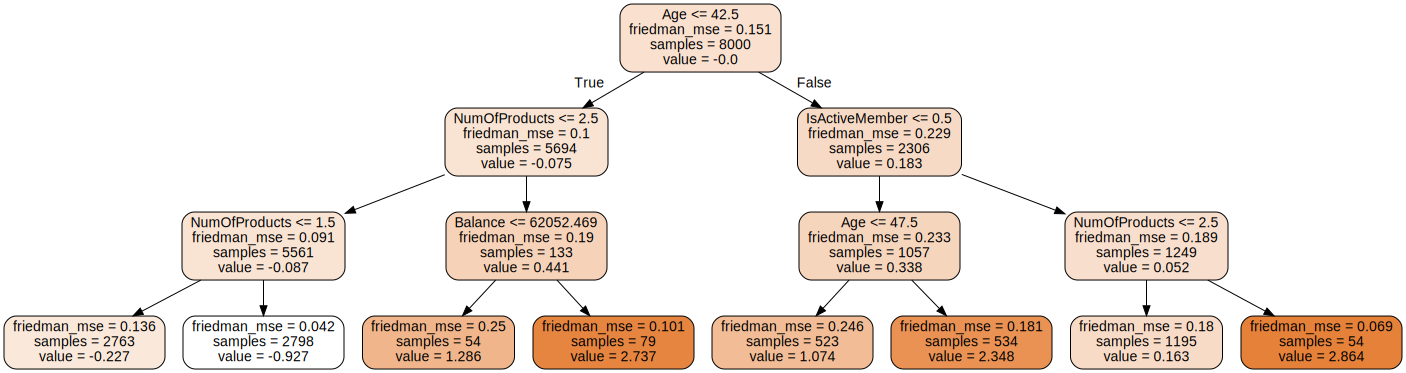

In [99]:
graphdata = tree.export_graphviz(model7[3][0],feature_names=feature_names,
                                class_names=class_names,rounded=True,filled=True)
graph = graphviz.Source(graphdata)
graph

## XGBoost implementation

In [100]:
# pip install xgboost

In [101]:
from xgboost import XGBClassifier

model8 = XGBClassifier()

model8.fit(xtr,ytr)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
# analyzing performance on test data
ypred = model8.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [103]:
# analyzing performance on train data
ypred = model8.predict(xtr)
print(metrics.classification_report(ytr,ypred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6370
           1       0.94      0.73      0.82      1630

    accuracy                           0.93      8000
   macro avg       0.94      0.86      0.89      8000
weighted avg       0.94      0.93      0.93      8000



## Stacking implementation

In [106]:
# pip install mlxtend


In [112]:
from mlxtend.classifier import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

base1 = DecisionTreeClassifier(class_weight='balanced',max_depth=12,min_samples_leaf=10,
                              min_samples_split=30,random_state=10)

base2 = RandomForestClassifier(n_estimators=300,random_state=10,
                               max_depth=5,class_weight='balanced')

base3 = AdaBoostClassifier(n_estimators=500)

base4 = KNeighborsClassifier(n_neighbors=5)


meta = LogisticRegression()

model9 = StackingClassifier(classifiers=[base1,base2,base3,base4],
                           meta_classifier=meta,use_probas=True)

In [113]:
model9.fit(xtr,ytr)

StackingClassifier(classifiers=[DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=12,
                                                       min_samples_leaf=10,
                                                       min_samples_split=30,
                                                       random_state=10),
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       n_estimators=300,
                                                       random_state=10),
                                AdaBoostClassifier(n_estimators=500),
                                KNeighborsClassifier()],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [114]:
# analyzing performance on test data
ypred = model9.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1593
           1       0.61      0.50      0.55       407

    accuracy                           0.83      2000
   macro avg       0.75      0.71      0.73      2000
weighted avg       0.82      0.83      0.83      2000



In [115]:
# analyzing performance on train data
ypred = model9.predict(xtr)
print(metrics.classification_report(ytr,ypred))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6370
           1       0.79      0.72      0.75      1630

    accuracy                           0.90      8000
   macro avg       0.86      0.84      0.85      8000
weighted avg       0.90      0.90      0.90      8000



In [119]:
model10 = StackingClassifier(classifiers=[model2,model3,model4,model5,model6,model7],
                           meta_classifier=meta,use_probas=True,fit_base_estimators=False)

In [120]:
model10.fit(xtr,ytr)

C:\Users\admin\anaconda3\lib\site-packages\mlxtend\classifier\stacking_classification.py:160: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=3),
                                DecisionTreeClassifier(random_state=3),
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=9,
                                                       min_samples_leaf=15,
                                                       min_samples_split=40,
                                                       random_state=3),
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=6,
                                                       min_samples_leaf=10,
                                                       n_estimators=300,
                                                       random_state=3),
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
   

In [121]:
# analyzing performance on test data
ypred = model10.predict(xts)
print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1593
           1       0.73      0.54      0.62       407

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [122]:
# analyzing performance on train data
ypred = model10.predict(xtr)
print(metrics.classification_report(ytr,ypred))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6370
           1       0.80      0.60      0.68      1630

    accuracy                           0.89      8000
   macro avg       0.85      0.78      0.81      8000
weighted avg       0.88      0.89      0.88      8000



In [123]:
StackingClassifier?